In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
#from mpl_toolkits.basemap import Basemap

In [2]:
url = 'sismos.csv'
url='https://github.com/seismomat/HerramientasComputacionales/blob/main/sismos.csv?raw=true'
df = pd.read_csv(url,sep=',')
# Convierte la columna de fecha y hora a tipo datetime si aún no está en ese formato
df["Fecha_Hora"] = pd.to_datetime(df["Fecha"] + " " + df["Hora"])


#df = pd.read_csv(url, index_col=0,sep=';')
print(df.head(2))

        Fecha      Hora  Magnitud  Latitud  Longitud  Profundidad  \
0  07/09/2017  01:47:09       3.6  16.3888  -98.2148         29.7   
1  07/09/2017  02:05:25       4.7  14.8583  -94.1578         24.8   

                    Referencia de localizacion   Fecha UTC  Hora UTC  \
0  18 km al NOROESTE de PINOTEPA NACIONAL, OAX  07/09/2017  06:47:09   
1       137 km al SUROESTE de PIJIJIAPAN, CHIS  07/09/2017  07:05:25   

    Estatus          Fecha_Hora  
0  revisado 2017-07-09 01:47:09  
1  revisado 2017-07-09 02:05:25  


Observando si está el sismo de magnitud 8.2 que sucedió en CHiapas

In [3]:
df[df['Magnitud']>=7]
#df.iloc[]

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Fecha_Hora
61,07/09/2017,23:49:17,8.2,14.761,-94.103,45.9,"140 km al SUROESTE de PIJIJIAPAN, CHIS",08/09/2017,04:49:17,revisado,2017-07-09 23:49:17


In [4]:
# Filtrar las filas donde la columna "Referencia de localizacion" contiene la palabra "CHIS"
dataBase = df[df['Referencia de localizacion'].str.contains('CHIS')]
# Muestra los registros filtrados
print(dataBase)

           Fecha      Hora  Magnitud  Latitud  Longitud  Profundidad  \
1     07/09/2017  02:05:25       4.7  14.8583  -94.1578         24.8   
5     07/09/2017  03:09:56       3.8  14.7753  -94.1315         16.3   
20    07/09/2017  09:28:46       3.8  15.5748  -93.6012         72.8   
24    07/09/2017  10:37:17       3.6  16.8858  -93.8227        159.8   
33    07/09/2017  12:17:53       3.6  16.8052  -94.1800        128.9   
...          ...       ...       ...      ...       ...          ...   
2355  15/09/2017  23:31:44       3.5  14.9725  -93.3380         38.0   
2358  15/09/2017  23:45:07       3.5  15.1267  -94.2977         40.0   
2359  15/09/2017  23:49:10       3.8  15.2682  -93.7072         29.9   
2360  15/09/2017  23:50:43       3.7  15.0913  -93.9778         20.0   
2361  15/09/2017  23:52:28       4.2  17.3602  -93.4980         20.0   

                  Referencia de localizacion   Fecha UTC  Hora UTC   Estatus  \
1     137 km al SUROESTE de PIJIJIAPAN, CHIS  07/09/201

In [5]:
# Define la fecha y hora de referencia después de la cual deseas filtrar
fecha_hora_referencia = pd.to_datetime("2017-07-09 23:50:00")  

dataBase = dataBase[dataBase["Fecha_Hora"] > fecha_hora_referencia]
# Muestra los registros filtrados
print(dataBase)

           Fecha      Hora  Magnitud  Latitud  Longitud  Profundidad  \
68    08/09/2017  00:31:38       3.3  16.6580  -93.9970         97.7   
74    08/09/2017  00:57:01       4.0  15.1798  -94.4933         20.0   
82    08/09/2017  01:13:11       4.1  14.9977  -94.2835         17.4   
83    08/09/2017  01:14:24       3.5  15.1348  -94.5113         16.5   
87    08/09/2017  01:22:32       3.9  15.0148  -94.4663         30.0   
...          ...       ...       ...      ...       ...          ...   
2355  15/09/2017  23:31:44       3.5  14.9725  -93.3380         38.0   
2358  15/09/2017  23:45:07       3.5  15.1267  -94.2977         40.0   
2359  15/09/2017  23:49:10       3.8  15.2682  -93.7072         29.9   
2360  15/09/2017  23:50:43       3.7  15.0913  -93.9778         20.0   
2361  15/09/2017  23:52:28       4.2  17.3602  -93.4980         20.0   

                  Referencia de localizacion   Fecha UTC  Hora UTC   Estatus  \
68         30 km al OESTE de CINTALAPA, CHIS  08/09/201

In [6]:
dataBase = dataBase.sort_values(by='Magnitud',ascending=False)
dataBase

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus,Fecha_Hora
427,08/09/2017,23:54:49,5.6,14.7448,-94.0787,23.4,"140 km al SUROESTE de PIJIJIAPAN, CHIS",09/09/2017,04:54:49,revisado,2017-08-09 23:54:49
1096,11/09/2017,16:09:13,5.6,15.0020,-94.0580,16.1,"118 km al SUROESTE de PIJIJIAPAN, CHIS",11/09/2017,21:09:13,revisado,2017-11-09 16:09:13
1151,12/09/2017,00:08:44,5.5,14.9748,-94.0125,24.9,"117 km al SUROESTE de PIJIJIAPAN, CHIS",12/09/2017,05:08:44,revisado,2017-12-09 00:08:44
1119,11/09/2017,20:12:31,5.2,15.0002,-94.5550,29.0,"148 km al SUROESTE de TONALA, CHIS",12/09/2017,01:12:31,revisado,2017-11-09 20:12:31
1475,13/09/2017,00:09:31,5.0,15.2148,-93.6858,54.6,"73 km al SUROESTE de PIJIJIAPAN, CHIS",13/09/2017,05:09:31,revisado,2017-09-13 00:09:31
...,...,...,...,...,...,...,...,...,...,...,...
2014,14/09/2017,19:56:22,3.1,15.1910,-93.5957,7.1,"69 km al SUROESTE de PIJIJIAPAN, CHIS",15/09/2017,00:56:22,revisado,2017-09-14 19:56:22
2151,15/09/2017,06:20:54,3.1,15.0133,-93.3143,48.1,"66 km al SUROESTE de MAPASTEPEC, CHIS",15/09/2017,11:20:54,revisado,2017-09-15 06:20:54
1331,12/09/2017,14:36:53,3.1,14.9292,-93.4160,16.4,"80 km al SUROESTE de MAPASTEPEC, CHIS",12/09/2017,19:36:53,revisado,2017-12-09 14:36:53
1850,14/09/2017,03:46:54,3.0,14.9410,-94.1662,16.6,"132 km al SUROESTE de PIJIJIAPAN, CHIS",14/09/2017,08:46:54,revisado,2017-09-14 03:46:54


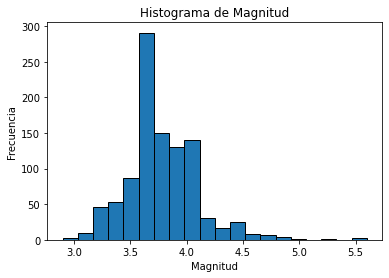

In [8]:
plt.hist(dataBase["Magnitud"], bins=20, edgecolor='black')  # Cambia el número de bins según tu preferencia
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.title("Histograma de Magnitud")
plt.show()

In [ ]:
Lx,Ly=df["Longitud"],df["Longitud"]

In [ ]:
def mapa(Lx,Ly):
    ## Lx son las longitudes
    ## Ly son las latitudes
    
    fig, ax = plt.subplots(figsize=(13, 13))
    m = Basemap(
            ax = ax,
            resolution = None,
            projection = 'merc',
            llcrnrlon = -106, llcrnrlat = 13,
            urcrnrlon = -90, urcrnrlat = 22    
        )
        
        #m = Basemap(width=120000000,height=90000000,projection='lcc',
        #    resolution=None,lat_1=80,lat_2=90,lat_0=40,lon_0=-107)
        # Cargar cartografía ráster base
    tierra = m.shadedrelief()
        #m.etopo()
         
        # Mostrar paralelos y meridianos
        
    paralelos = m.drawparallels(np.linspace(-90,90,13), color='grey')
    meridianos = m.drawmeridians(np.linspace(-180,180,13), color='grey')
         
    xx,yy=m(Lx,Ly)
    m.plot(xx,yy, '^', markersize=10,color="black",marker="o")
    #datos1=pd.read_csv(ruta+sismos).to_numpy()
    #x1,y1=m(datos1[:,1],datos1[:,0])
    #m.plot(x1,y1, '^', markersize=10,color="black")
    plt.show()
    #fig.savefig(imagen+ce)
    
    return None

In [ ]:
mapa(Lx,Ly)